In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Clean_dataset.csv')

In [ ]:
df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,xG,...,Clr,Err,Season,Team,Opponent,Attendance,Captain,Formation,Opp Formation,Referee
0,17-08-2024,12:30,Premier League,Matchweek 1,Sat,Away,W,2,0,2.6,...,17,1,2025,Liverpool,Ipswich Town,30014.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tim Robinson
1,25-08-2024,16:30,Premier League,Matchweek 2,Sun,Home,W,2,0,2.5,...,12,0,2025,Liverpool,Brentford,60017.0,Virgil van Dijk,4-2-3-1,04-04-2002,Stuart Attwell
2,01-09-2024,16:00,Premier League,Matchweek 3,Sun,Away,W,3,0,1.8,...,28,0,2025,Liverpool,Manchester Utd,73738.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Anthony Taylor
3,14-09-2024,15:00,Premier League,Matchweek 4,Sat,Home,L,0,1,0.9,...,16,0,2025,Liverpool,Nott'ham Forest,60344.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Michael Oliver
4,21-09-2024,15:00,Premier League,Matchweek 5,Sat,Home,W,3,0,2.0,...,24,1,2025,Liverpool,Bournemouth,60347.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tony Harrington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,02-05-2021,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,0.5,...,14,0,2021,Sheffield United,Tottenham,NaN,John Egan,3-4-1-2,4-2-3-1,Andre Marriner
3176,08-05-2021,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,0.7,...,19,2,2021,Sheffield United,Crystal Palace,NaN,John Egan,03-05-2002,04-03-2003,Simon Hooper
3177,16-05-2021,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,1.2,...,27,0,2021,Sheffield United,Everton,NaN,John Egan,03-04-2003,4-2-3-1,Jonathan Moss
3178,19-05-2021,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,0.9,...,16,0,2021,Sheffield United,Newcastle Utd,10000.0,John Egan,03-04-2003,05-03-2002,Robert Jones


In [3]:
total_matches = len(df)

In [4]:
total_matches

3180

In [5]:
df_2025 = df[df['Season'] == 2025]
len(df_2025)

140

In [6]:
df = df[df['Season'] != 2025]

In [7]:
len(df)

3040

In [8]:
home_wins = 0
away_wins = 0

In [9]:
for index, row in df.iterrows():
  if row['Venue'] == 'Home' and row['Result'] == 'W':
    home_wins += 1
  elif row['Venue'] == 'Away' and row['Result'] == 'W':
    away_wins += 1

In [10]:
draws_df = df[(df['Result'] == 'D')]
len(draws_df)

680

In [11]:
unique_draws_df = draws_df.drop_duplicates(subset=['Date', 'Referee'])
draws = unique_draws_df.shape[0]

In [12]:
draws, home_wins, away_wins

(340, 666, 514)

In [13]:
home_win_percentage = (home_wins / total_matches) * 100
draw_percentage = (draws / total_matches) * 100
away_win_percentage = (away_wins / total_matches) * 100

In [14]:
print(f"Home Team Wins: {home_win_percentage:.2f}%")
print(f"Draws: {draw_percentage:.2f}%")
print(f"Away Team Wins: {away_win_percentage:.2f}%")

Home Team Wins: 20.94%
Draws: 10.69%
Away Team Wins: 16.16%


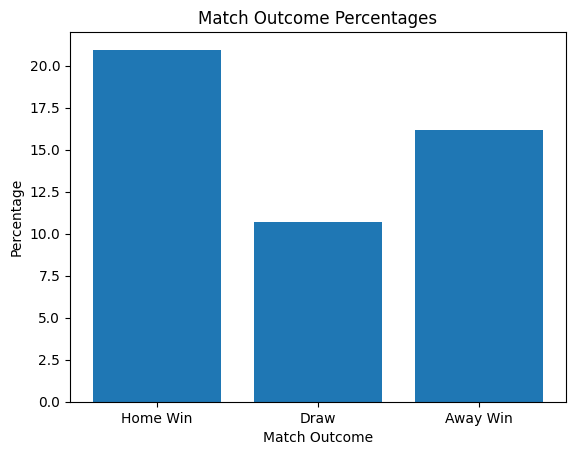

In [15]:
# Data for  plotting
categories = ['Home Win', 'Draw', 'Away Win']
percentages = [home_win_percentage, draw_percentage, away_win_percentage]

# Plotting the bar chart
plt.bar(categories, percentages)
plt.xlabel('Match Outcome')
plt.ylabel('Percentage')
plt.title('Match Outcome Percentages')
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [17]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [18]:
numerical_df

,GF,GA,xG,xGA,Poss,Gls,Sh,SoT,SoT%,G/Sh,...,Lost,Blocks,Sh.1,Pass,Int,Tkl+Int,Clr,Err,Season,Attendance
140,3,0,1.9,0.3,65,3,17,8,47.1,0.18,...,3,9,2,7,4,21,7,2,2024,21572.0
141,1,0,1.0,0.3,59,1,14,4,28.6,0.07,...,5,9,3,6,4,15,10,1,2024,53419.0
142,2,1,3.5,0.7,79,2,29,9,31.0,0.07,...,6,10,1,9,4,16,6,0,2024,31336.0
143,5,1,2.2,1.4,68,5,6,4,66.7,0.67,...,4,2,0,2,8,25,11,0,2024,52899.0
144,3,1,3.6,0.9,68,3,29,13,44.8,0.10,...,4,7,1,6,7,18,9,0,2024,62475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,0,4,0.5,2.2,34,0,8,1,12.5,0.00,...,15,8,4,4,8,21,14,0,2021,NaN
3176,0,2,0.7,2.0,50,0,7,0,0.0,0.00,...,17,13,6,7,9,31,19,2,2021,NaN
3177,1,0,1.2,1.4,38,1,10,3,30.0,0.10,...,7,13,5,8,8,22,27,0,2021,NaN
3178,0,1,0.9,1.6,49,0,11,1,9.1,0.00,...,24,12,2,10,4,21,16,0,2021,10000.0


In [19]:
correlation_matrix = numerical_df.corr()

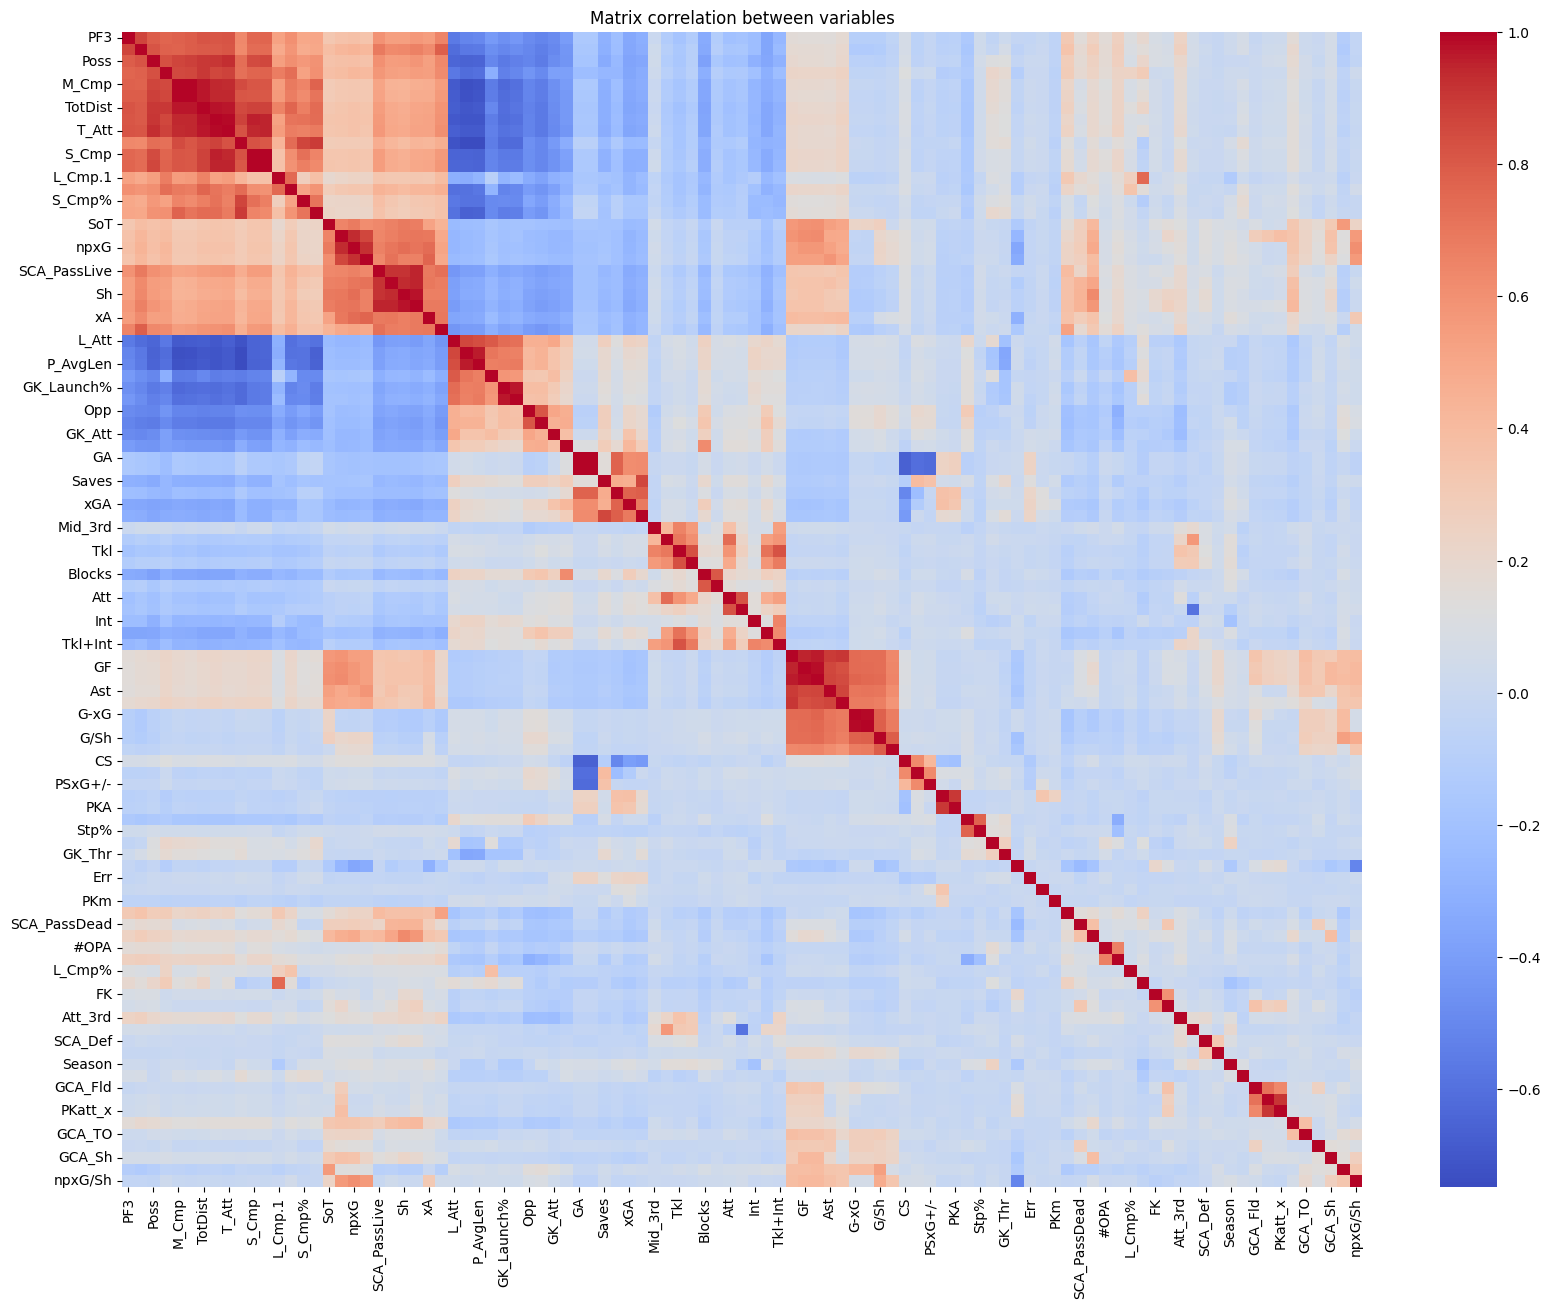

In [20]:
# Perform hierarchical clustering
Z = linkage(correlation_matrix, 'ward')
dendro = dendrogram(Z, labels=correlation_matrix.columns, no_plot=True)
ordered_columns = dendro['ivl']

# Reorder the correlation matrix
correlation_matrix = correlation_matrix.loc[ordered_columns, ordered_columns]

# Plot the correlation matrix with clustering and rotated labels
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matrix correlation between variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [21]:
# Identify variables most related to each other
high_correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1]  # Exclude self-correlation

# Identify variables that could more clearly predict the goal attribute (e.g., Goals)
goal_correlations = correlation_matrix['GF'].sort_values(ascending=False)

# Identify variables that could be excluded (low correlation with Goals)
low_correlation_threshold = 0.1
low_correlation_vars = goal_correlations[goal_correlations.abs() < low_correlation_threshold]

In [22]:
high_correlation_pairs.head(10)

,,0
S_Cmp,S_Att,0.996034
S_Att,S_Cmp,0.996034
M_Att,M_Cmp,0.994295
M_Cmp,M_Att,0.994295
T_Cmp,T_Att,0.991957
T_Att,T_Cmp,0.991957
np:G-xG,G-xG,0.988583
G-xG,np:G-xG,0.988583
GF,Gls,0.984171
Gls,GF,0.984171


In [23]:
goal_correlations.head(10)

,GF
GF,1.000000
Gls,0.984171
GCA,0.949968
Ast,0.857397
GCA_PassLive,0.834948
G-xG,0.746262
np:G-xG,0.734077
G/Sh,0.731409
G/SoT,0.638264
xG,0.616163


In [24]:
low_correlation_vars.head()

,GF
L_Cmp.1,0.092568
SCA_Fld,0.091461
Att_3rd,0.085561
Season,0.076039
Attendance,0.046744


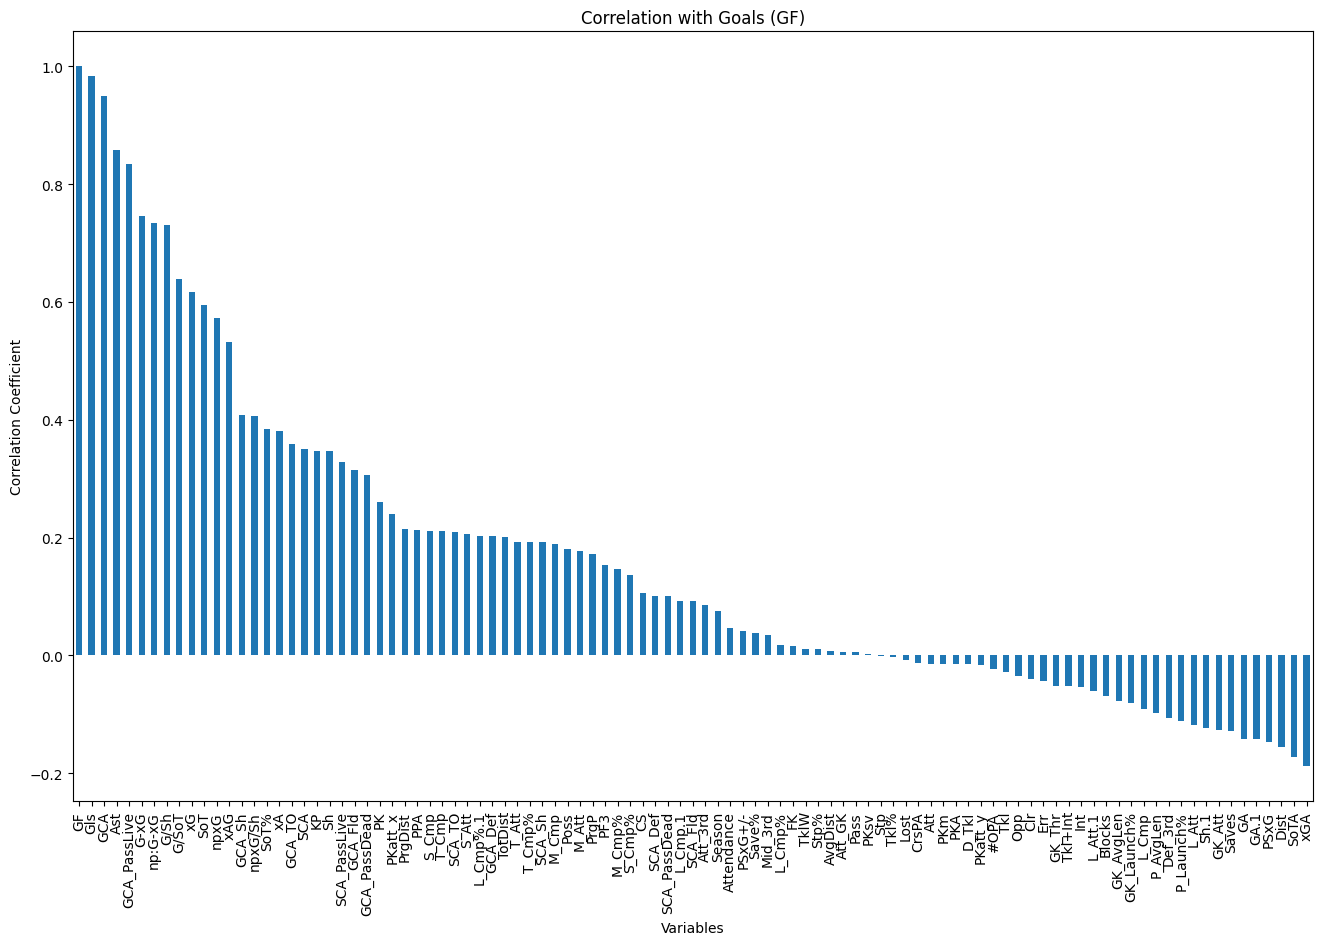

In [25]:
# Plot goal correlations
plt.figure(figsize=(16, 10))
goal_corr_plot = goal_correlations.plot(kind='bar')
plt.title('Correlation with Goals (GF)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

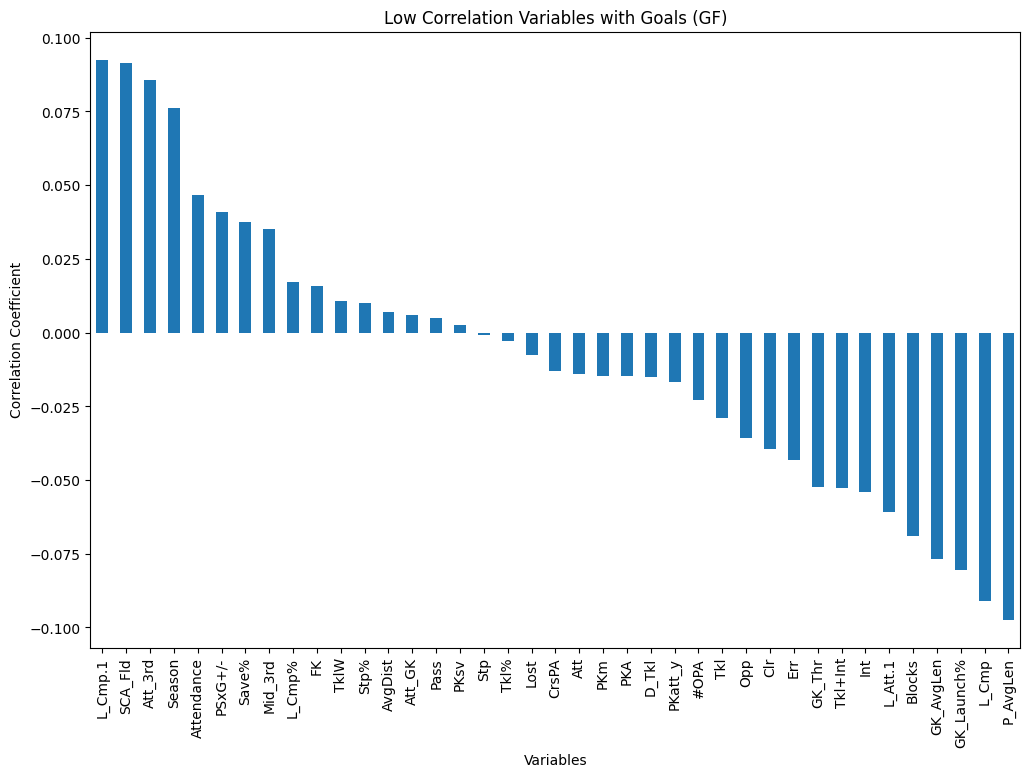

In [26]:
# Plot low correlation variables
plt.figure(figsize=(12, 8))
low_corr_plot = low_correlation_vars.plot(kind='bar')
plt.title('Low Correlation Variables with Goals (GF)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Encode the Result attribute
df['Result_Encoded'] = df['Result'].map({'W': 3, 'D': 1, 'L': 0})
numerical_df = df.select_dtypes(include=['float64', 'int64'])

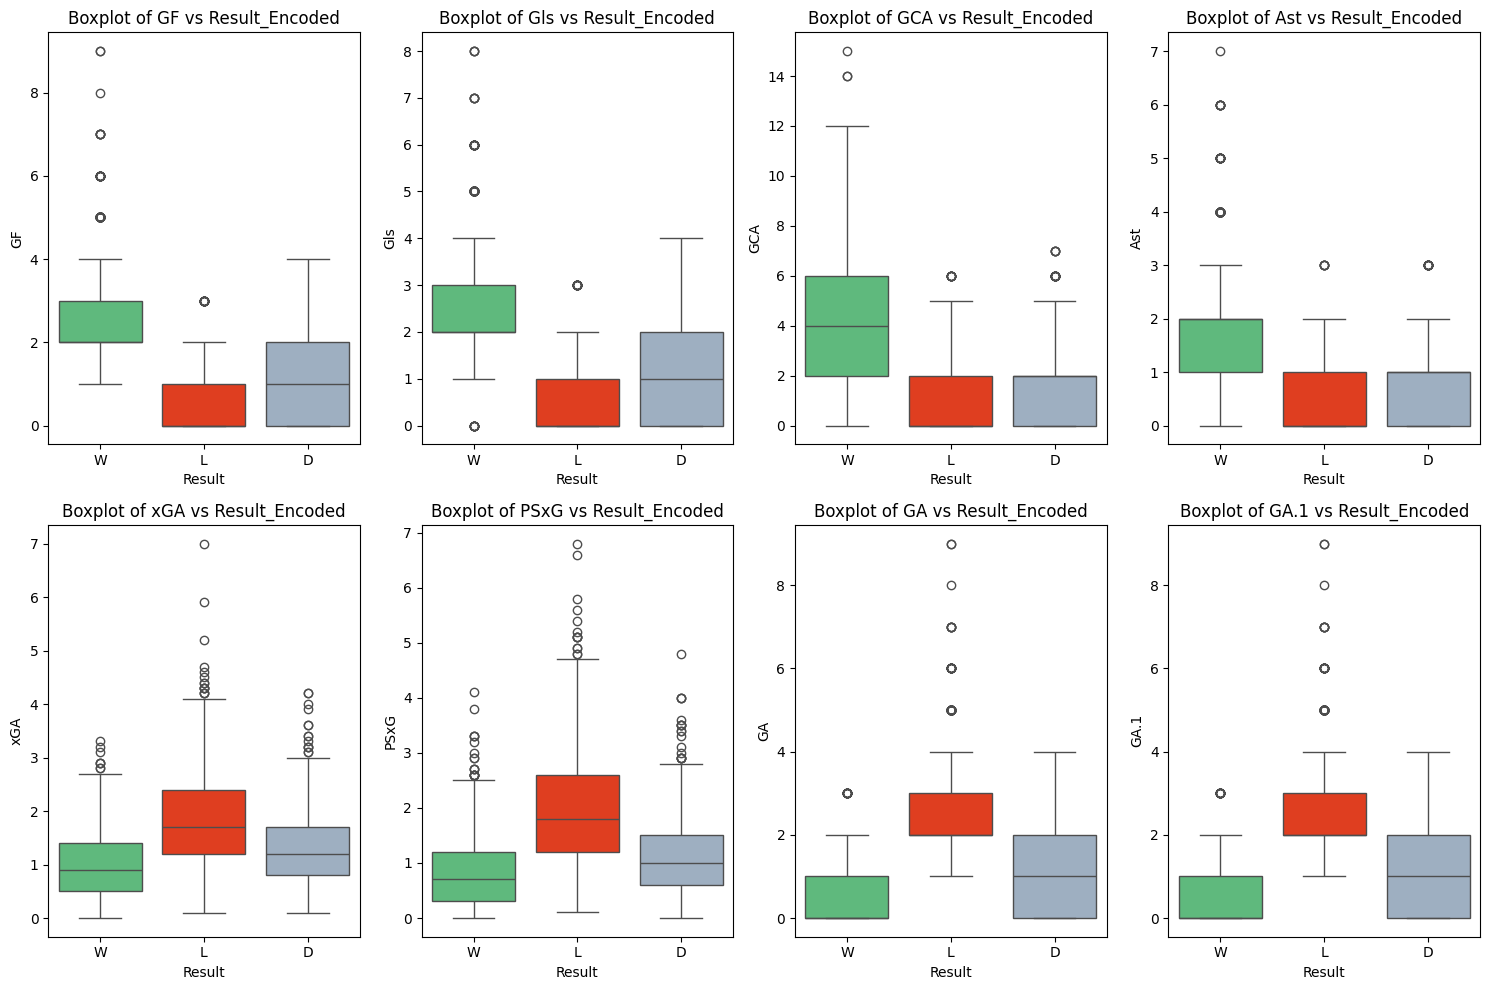

In [28]:
# Add the encoded Result column
numerical_df['Result_Encoded'] = df['Result_Encoded']

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Identify variables that could more clearly predict the result attribute
result_correlations = correlation_matrix['Result_Encoded'].sort_values(ascending=False)

# Remove 'Result_Encoded' from the list of best and worst related variables
best_related_vars = result_correlations.drop('Result_Encoded').head(4).index.tolist()
worst_related_vars = result_correlations.drop('Result_Encoded').tail(4).index.tolist()

# Plot boxplots for best and worst related variables with result attribute
plt.figure(figsize=(15, 10))
palette = {'W': "#50C878", 'D': "#98AFC7", 'L': "#FF2800"}

# Best related  variables
for i, var in enumerate(best_related_vars):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df['Result'], y=df[var], hue=df['Result'], palette=palette, dodge=False, legend=False)
    plt.title(f'Boxplot of {var} vs Result_Encoded')

# Worst related variables
for i, var in enumerate(worst_related_vars):
    plt.subplot(2, 4, i + 5)
    sns.boxplot(x=df['Result'], y=df[var], hue=df['Result'], palette=palette, dodge=False, legend=False)
    plt.title(f'Boxplot of {var} vs Result_Encoded')

plt.tight_layout()
plt.show()


In [29]:
best_related_vars

['GF', 'Gls', 'GCA', 'Ast']

In [30]:
# Filter to relevant columns for goalkeeper stats analysis
goalkeeper_columns = ['Team', 'Season', 'Saves', 'CS', 'PKsv', 'Stp']
goalkeeper_data = df[goalkeeper_columns].dropna(subset=['Team', 'Season', 'Saves', 'CS', 'PKsv', 'Stp'])

# Aggregate data to calculate total Saves, CS, PKsv, and Stp per team per season
seasonal_stats = goalkeeper_data.groupby(['Season', 'Team']).agg({
    'Saves': 'sum',       # Total saves over the season
    'CS': 'sum',          # Total clean sheets for the season
    'PKsv': 'sum',        # Total penalty kicks saved
    'Stp': 'sum'          # Total crosses stopped
}).reset_index()

# Identify the team with the most Saves for each season
best_teams_by_season = []
for season in sorted(seasonal_stats['Season'].unique()):
    season_data = seasonal_stats[seasonal_stats['Season'] == season]

    # Find the team with the highest total Saves in each season
    best_team = season_data.loc[season_data['Saves'].idxmax()]
    best_teams_by_season.append(best_team)

# Create a DataFrame for the best teams by season
best_goalkeepers_table = pd.DataFrame(best_teams_by_season)[['Season', 'Team', 'Saves', 'CS', 'PKsv', 'Stp']]
best_goalkeepers_table

,Season,Team,Saves,CS,PKsv,Stp
17,2021,West Bromwich Albion,166,6,1,20
28,2022,Leeds United,146,5,0,23
43,2023,Brentford,154,12,0,53
78,2024,West Ham United,169,5,2,35


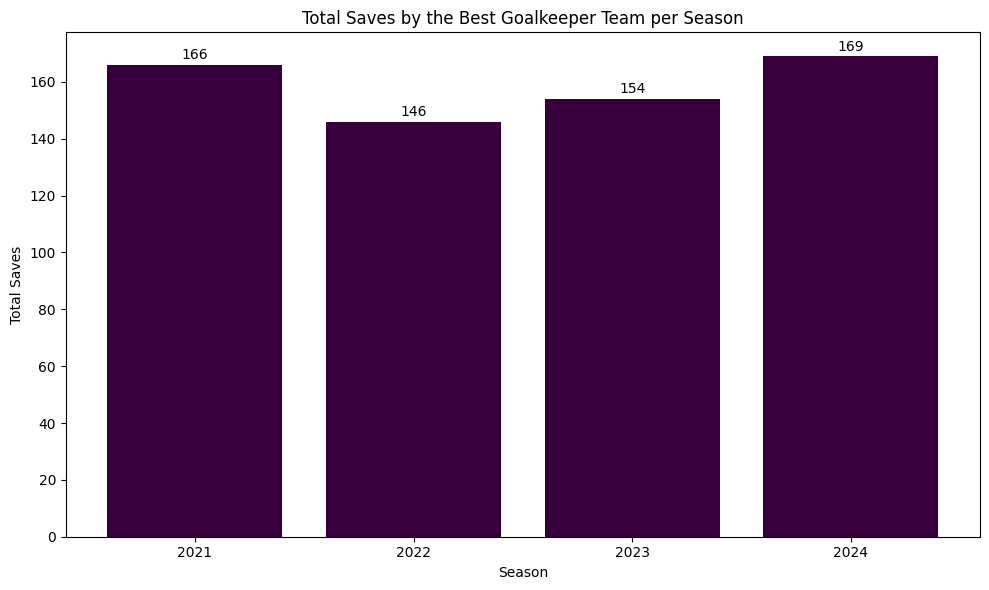

In [31]:
# Plot a bar graph showing Saves by the best team for each season
plt.figure(figsize=(10, 6))
plt.bar(best_goalkeepers_table['Season'], best_goalkeepers_table['Saves'], color='#37003c')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Total Saves')
plt.title('Total Saves by the Best Goalkeeper Team per Season')
plt.xticks(best_goalkeepers_table['Season'])

# Annotate bars with Saves values
for index, value in enumerate(best_goalkeepers_table['Saves']):
    plt.text(best_goalkeepers_table['Season'].iloc[index], value + 1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()